# Análise de Opiniões sobre Livros com Python

## Etapa 1 - Importação de Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import spacy as sp
import matplotlib.pyplot as plt
import tensorflow as tf

import string
import random
import re
import math

from bs4 import BeautifulSoup

from tensorflow.keras import layers
import tensorflow_datasets as tfds

2023-11-14 10:52:56.700997: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 10:52:57.126139: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-14 10:52:57.126180: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-14 10:52:57.128963: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-14 10:52:57.380382: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 10:52:57.384172: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
tf.__version__

'2.14.0'

## Etapa 2 - Pré-processamento dos dados

### Carregamento dos dados

In [3]:
import pandas as pd

caminho_do_arquivo = './train/utlc_movies.csv'
cols = ["review_text_tokenized", "polarity"]
train_data  = pd.read_csv(caminho_do_arquivo)


In [4]:
train_data.drop(['original_index', 'review_text', 
       'review_text_tokenized', 'rating', 'kfold_polarity',
       'kfold_rating'], axis=1, inplace=True)

In [5]:
train_data.fillna(0, inplace=True)

In [6]:
train_data.polarity.unique()

array([1., 0.])

<Axes: xlabel='polarity', ylabel='count'>

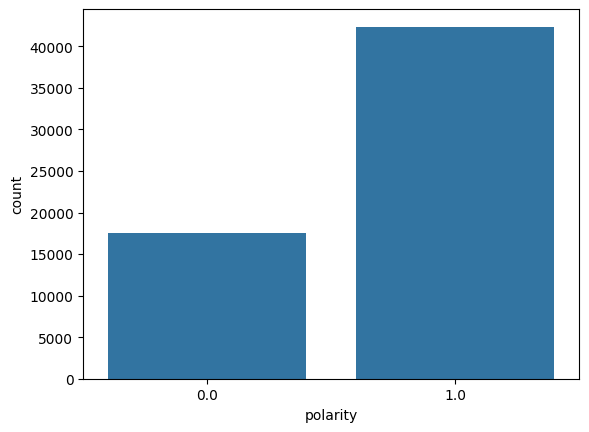

In [7]:
sns.countplot(train_data, x="polarity")

In [8]:
train_data["polarity"].value_counts()

polarity
1.0    42356
0.0    17527
Name: count, dtype: int64

### Limpeza dos dados

In [9]:
data = train_data
data.columns

Index(['review_text_processed', 'polarity'], dtype='object')

In [10]:
X = data.iloc[1:, 0].values
X

array(['o filme e realmente diferente e bem lento mas nao de uma forma ruim ou entediante, e muito interessante e chama atencao desde o inicio nos mantendo atentos ate o final. a atuacao da amy adams e muito boa e aqui onde ela realmente merecia uma indicacao ao oscar infelizmente foi esnobada, jeremy renner tambem esta otimo como sempre. fotografia muito boa e todas as tecnicas de som sao perfeitas, mereceu o oscar por melhor edicao de som porque e simplesmente perfeito o trabalho que fizeram com o som deste filme, quando os aliens se comunicam com a louise e fascinante. na minha opiniao nao e um filme convencional sobre ataque alienigena, e muito mais profundo que isso focando muito no drama, nao espere acao de "a chegada" porque definitivamente nao e um filme ao estilo "guerra dos mundos" e "independence day" (apesar de eu gostar de ambos os filmes citados), e realmente um drama psicologico bem intenso que nos mostra como a mente humana e limitada achando que tudo aquilo que e desco

In [11]:
X.shape

(59882,)

In [12]:
type(X)

numpy.ndarray

In [13]:
y = data.iloc[1:, 1].values
y.shape

(59882,)

In [14]:
from sklearn.model_selection import train_test_split

X, _, y,_ = train_test_split(X, y, test_size = 0.85, stratify = y)   

In [15]:
y.shape, X.shape

((8982,), (8982,))

In [16]:
unique, counts = np.unique(y, return_counts=True)
unique, counts 

(array([0., 1.]), array([2629, 6353]))

In [17]:
def clean_tweet(tweet):
    tweet = BeautifulSoup(tweet, 'lxml').get_text()
    
    tweet = re.sub(r'@', ' ', tweet)
    tweet = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', tweet)
    tweet = re.sub(r'\d+', ' ', tweet)
    tweet = tweet.replace("htt", "").replace("\n", "")
    tweet = re.sub(r' +', ' ', tweet)
    
    return tweet

In [18]:
text = data.iloc[2500, 0]
text

'agora posso falar: chega dia 26! chega! *---------*'

In [19]:
text = clean_tweet(text)
text

'agora posso falar: chega dia ! chega! *---------*'

In [20]:
# Retirando stopwords

nlp = sp.load("pt_core_news_sm")
nlp

In [21]:
stop_words = sp.lang.pt.STOP_WORDS
print(stop_words)
len(stop_words)

{'vens', 'fazem', 'dezanove', 'nosso', 'também', 'debaixo', 'nós', 'pontos', 'sétimo', 'vinda', 'em', 'após', 'ora', 'todas', 'usar', 'todos', 'tendes', 'número', 'alguns', 'custa', 'tivemos', 'muito', 'fazemos', 'sou', 'bem', 'dizer', 'longe', 'cá', 'ter', 'lugar', 'fazes', 'lá', 'talvez', 'seu', 'aquilo', 'novo', 'fomos', 'tenho', 'esta', 'baixo', 'conselho', 'ligado', 'meus', 'numa', 'segunda', 'ontem', 'essas', 'vais', 'próprio', 'demais', 'vinte', 'mais', 'quieto', 'vos', 'caminho', 'fará', 'quero', 'oito', 'sistema', 'aqueles', 'quê', 'os', 'põe', 'vós', 'quanto', 'somos', 'grande', 'nível', 'além', 'umas', 'ali', 'como', 'deste', 'disso', 'estiveram', 'num', 'vezes', 'coisa', 'quinze', 'toda', 'ver', 'tivestes', 'números', 'ir', 'foram', 'às', 'antes', 'nuns', 'oitava', 'é', 'maior', 'na', 'vem', 'direita', 'cento', 'nada', 'nas', 'terceiro', 'seis', 'questão', 'vossos', 'relação', 'atrás', 'eles', 'pouca', 'muitos', 'portanto', 'me', 'pelos', 'forma', 'cima', 'aquele', 'cuja', 

416

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
def clean_tweet2(tweet):
    tweet = tweet.lower()
    document = nlp(tweet)
    
    words = []
    for token in document:
        words.append(token.text)
    
    words = [word for word in words if word not in stop_words and word not in string.punctuation]
    words = ' '.join([str(element) for element in words])
    return words

In [24]:
text2 = clean_tweet2(text)
text2

'falar chega dia chega ---------'

In [25]:
# Aplicando em tudo
data_clean = [clean_tweet2(clean_tweet(tweet)) for tweet in X]
data_clean


/tmp/ipykernel_749/2669493784.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  tweet = BeautifulSoup(tweet, 'lxml').get_text()
/tmp/ipykernel_749/2669493784.py:2: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  tweet = BeautifulSoup(tweet, 'lxml').get_text()


['acho fraquinho ouvi varios amigos comentarem samara dava medo nao conseguiria dormir assistir ... nao achei verdade nao levei susto fraco',
 'mary and max filme lindo estranho adoravel pequena obra destaque filmes animacao estilo artistico diferente sofisticado misturados emocionante estoria amizade solidao complementam dao filme inspirador divertido fator emocional dedicacao amizade mary max rendem momentos simples pura emocao dedicacao escolhas diretor focar temas pesados depressao maltrato solidao disturbios psicologicos variados filme alcancar patamar busca linguagem madura publico quase especifico definitivamente nao julgado fator negativo filme expoe problemas sensibilidade suficiente agradar pessoa idade dinamica sutilidade tornam experiencia reflexiva altamente inspiradora diferencial mary and max essencia especial densidade psicologica fatores unicos destacam obra importancia filmes animacao atualidade filme brilhante divertido sinceridade emocao excelente',
 'filme sensivel

In [26]:
data_labels = y
data_labels

array([0., 1., 1., ..., 1., 1., 0.])

In [27]:
np.unique(data_labels)

array([0., 1.])

### Tokenização

In [28]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data_clean, target_vocab_size = 2**16)

In [29]:
2**16 # Vocabulario

65536

In [30]:
tokenizer.vocab_size

26637

In [31]:
print(tokenizer.subwords)

['filme_', 'nao_', 'pra_', ' ... ', 'historia_', 'so_', 'ja_', 'filmes_', 'melhor_', 'sao_', 'tao_', 'filme', 'ate_', 'achei_', 'roteiro_', 'gostei_', 'cenas_', 'tambem_', 'trilha_', 'personagens_', 'vida_', 'cena_', 'acho_', 'assistir_', 'atuacao_', 'cinema_', ' ...', 'personagem_', 'voce_', 'sonora_', 'otimo_', 'realmente_', 'melhores_', 'atuacoes_', 'vi_', 'fotografia_', 'apesar_', 'pessoas_', 'lindo_', 'excelente_', 'cara_', 'acao_', 'vale_', 'incrivel_', 'livro_', 'obra_', 'mundo_', 'mim_', 'fiquei_', 'anos_', 'assisti_', 'efeitos_', 'dele_', 'porem_', 'pena_', 'sendo_', 'interessante_', 'momentos_', 'alem_', ' .. ', 'gente_', 'direcao_', 'coisas_', 'otima_', 'seja_', 'poderia_', 'quase_', 'q_', 'ha_', 'consegue_', 'amor_', 'legal_', 'elenco_', 'tinha_', 'diretor_', 'atores_', 'muita_', 'ficou_', 'simplesmente_', 'the_', 'se_', 'ai_', 'outro_', 'oscar_', 'ta_', 'la_', 'fato_', 'deixa_', 'fica_', 'trama_', 'principalmente_', 'super_', 'ruim_', 'feito_', 'esperava_', 'muitas_', 'fal

In [32]:
# Cada plavara terá um enconding para passar ao algoritmos
ids = tokenizer.encode("eu amo este livro")
ids

[958, 206, 7492, 730]

In [33]:
text = tokenizer.decode(ids)
text

'eu amo este livro'

In [34]:
data_inputs = [tokenizer.encode(sentence) for sentence in data_clean]
data_inputs

[[23,
  1801,
  1653,
  256,
  513,
  23495,
  14468,
  965,
  174,
  2,
  2138,
  1812,
  211,
  4,
  2,
  14,
  122,
  2,
  2460,
  1350,
  1387],
 [1541,
  587,
  802,
  1,
  39,
  509,
  2176,
  943,
  46,
  176,
  8,
  182,
  203,
  8139,
  109,
  6520,
  5494,
  169,
  710,
  512,
  1742,
  11511,
  924,
  1,
  1791,
  105,
  2793,
  1097,
  4822,
  512,
  1541,
  802,
  5305,
  58,
  101,
  573,
  466,
  4822,
  960,
  75,
  7370,
  656,
  3836,
  2543,
  17802,
  1742,
  11129,
  4401,
  8468,
  1,
  3672,
  3015,
  649,
  1136,
  5547,
  262,
  67,
  4741,
  648,
  2,
  18489,
  2793,
  1901,
  1,
  3119,
  412,
  939,
  637,
  1604,
  217,
  1046,
  2327,
  13603,
  2195,
  378,
  9107,
  2365,
  4614,
  3558,
  1541,
  587,
  802,
  695,
  645,
  4097,
  2234,
  4023,
  2615,
  11188,
  46,
  953,
  8,
  182,
  1716,
  1,
  353,
  105,
  3297,
  466,
  337],
 [1,
  418,
  315,
  430,
  641,
  1866,
  220,
  6329,
  2114,
  5,
  76,
  7169,
  1152,
  6038,
  10,
  579,
  49,


### Padding

In [35]:
# Preenchimento das sentenças, deixando tudo do mesmo tamanho
max_len = max(len(sentence) for sentence in data_inputs)
max_len

1120

In [36]:
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    data_inputs,
    value = 0,
    padding = 'post',
    maxlen=max_len
)
data_inputs

array([[   23,  1801,  1653, ...,     0,     0,     0],
       [ 1541,   587,   802, ...,     0,     0,     0],
       [    1,   418,   315, ...,     0,     0,     0],
       ...,
       [26481,     0,     0, ...,     0,     0,     0],
       [  851,   828,   879, ...,     0,     0,     0],
       [ 1214,  1266,  1413, ...,     0,     0,     0]], dtype=int32)

### Divisão da base de dados em treinamento e teste

In [37]:
train_inputs, test_inputs, trains_labels, test_labels = train_test_split(
    data_inputs,
    data_labels,
    test_size=0.1,
    stratify = data_labels
)

In [38]:
train_inputs[0]

array([   1, 4143,   13, ...,    0,    0,    0], dtype=int32)

In [39]:
train_inputs.shape

(8083, 1120)

In [40]:
trains_labels.shape

(8083,)

In [41]:
test_inputs.shape

(899, 1120)

In [42]:
test_labels.shape

(899,)

In [43]:
len(set(trains_labels))

2

## Construção do Modelo

In [44]:
class DCNN(tf.keras.Model):

  def __init__(self,
               vocab_size,
               emb_dim=128,
               nb_filters=50,
               ffn_units=512,
               nb_classes=2,
               dropout_rate=0.1,
               training=True,
               name="dcnn"):
    super(DCNN, self).__init__(name=name)

    self.embedding = layers.Embedding(vocab_size, emb_dim)

    self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, padding='same', activation='relu')

    self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, padding='same', activation='relu')

    self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, padding='same', activation='relu')

    self.pool = layers.GlobalMaxPool1D()

    self.dense_1 = layers.Dense(units = ffn_units, activation = 'relu')
    self.dropout = layers.Dropout(rate = dropout_rate)
    if nb_classes == 2:
      self.last_dense = layers.Dense(units = 1, activation = 'sigmoid')
    else:
      self.last_dense = layers.Dense(units = nb_classes, activation = 'softmax')

  def call(self, inputs, training):
    x = self.embedding(inputs)
    x_1 = self.bigram(x)
    x_1 = self.pool(x_1)
    x_2 = self.trigram(x)
    x_2 = self.pool(x_2)
    x_3 = self.fourgram(x)
    x_3 = self.pool(x_3)

    merged = tf.concat([x_1, x_2, x_3], axis = -1) # (batch_size, 3 * nb_filters)
    merged = self.dense_1(merged)
    merged = self.dropout(merged, training)
    output = self.last_dense(merged)

    return output
        

In [45]:
tokenizer.vocab_size

26637

## Treinamento

In [46]:
vocab_size = tokenizer.vocab_size
vocab_size

26637

In [85]:
emb_dim = 200
nb_filters = 100
ffn_units = 256
nb_classes = len(set(trains_labels))
dropout_rate = 0.2
nb_epochs = 10
batch_size = 64

In [86]:
Dcnn = DCNN(
    vocab_size=vocab_size, 
    emb_dim=emb_dim, 
    nb_filters=nb_filters, 
    ffn_units=ffn_units, 
    nb_classes=nb_classes, 
    dropout_rate=dropout_rate)

In [87]:
if nb_classes == 2:
    print("Duas Classes")
    Dcnn.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])
else:
    Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

Duas Classes


In [1]:
checkpoint_path = "./"
ckpt = tf.train.Checkpoint(Dcnn=Dcnn)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print('Latest checkpoint  restored')

NameError: name 'tf' is not defined

In [ ]:
history = Dcnn.fit(
    train_inputs, 
    trains_labels, 
    batch_size=batch_size,
    epochs=nb_epochs, 
    verbose=1, 
    validation_split=0.10
)

ckpt_manager.save()

## Avaliação

In [65]:
results = Dcnn.evaluate(test_inputs, test_labels, batch_size=batch_size)
print(results)

15/15 [==============================] - 2s 132ms/step - loss: 1.0050 - accuracy: 0.7219
[1.0050004720687866, 0.72191321849823]


In [66]:
y_pred_test = Dcnn.predict(test_inputs)

29/29 [==============================] - 2s 68ms/step


In [67]:
y_pred_test

array([[4.73742327e-03],
       [9.85764802e-01],
       [3.18646312e-01],
       [1.28362086e-02],
       [2.46626027e-02],
       [1.00000000e+00],
       [1.24542020e-01],
       [9.81674314e-01],
       [9.99922335e-01],
       [3.34311277e-01],
       [6.86677933e-01],
       [8.30815017e-01],
       [9.77984846e-01],
       [5.73871613e-01],
       [9.92856443e-01],
       [9.99297917e-01],
       [2.53001541e-01],
       [9.05761182e-01],
       [9.98574317e-01],
       [8.13280120e-02],
       [2.37417802e-01],
       [7.10040808e-01],
       [2.06892714e-01],
       [9.99848902e-01],
       [7.07583308e-01],
       [7.71683514e-01],
       [9.98638690e-01],
       [9.64093983e-01],
       [9.67953026e-01],
       [9.99717593e-01],
       [9.74732757e-01],
       [9.57881570e-01],
       [9.91997361e-01],
       [8.15392792e-01],
       [9.68713105e-01],
       [9.99041021e-01],
       [9.99861896e-01],
       [9.99990642e-01],
       [7.75530875e-01],
       [9.74633217e-01],


In [81]:
y_pred_test = (y_pred_test > 0.5)

In [82]:
y_pred_test

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [83]:
test_labels

array([0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0.

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred_test)
cm

array([[263,   0],
       [636,   0]])

<Axes: >

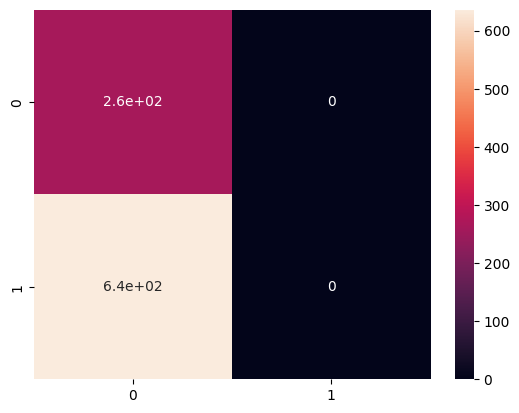

In [59]:
sns.heatmap(cm, annot=True)

In [72]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

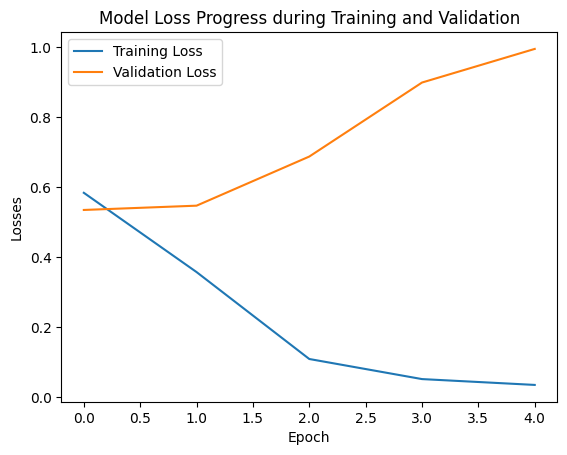

In [73]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('Model Loss Progress during Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(['Training Loss', 'Validation Loss'])

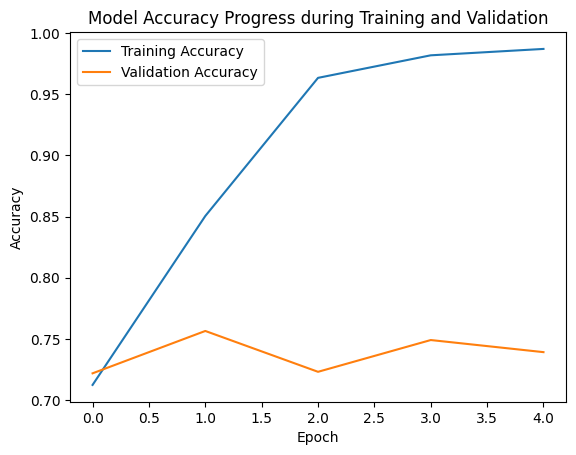

In [74]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model Accuracy Progress during Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])

## Previsões

In [79]:
text = """uma bosta, uma merda"""

text = clean_tweet2(clean_tweet(text))


text = tokenizer.encode(text)
text

[1837, 2725]

In [80]:
prev = Dcnn(np.array([text]), training=False).numpy()


print(prev)
print(np.argmax(prev, axis=1))
print(np.argmin(prev, axis=1))



[[0.0051251]]
[0]
[0]


In [ ]:
weights_save_path = './model'
Dcnn.save_weights(weights_save_path)

In [ ]:
weights_path = './model'
Dcnn.load_weights(weights_path)

In [ ]:
model_save_path = './model'
Dcnn.save(model_save_path)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(Dcnn)
tflite_model = converter.convert()
tflite_save_path = './model/modelo.tflite'
with open(tflite_save_path, 'wb') as f:
    f.write(tflite_model)

print("Modelo treinado exportado com sucesso!")